In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start(

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start(

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [2]:
df = pd.read_csv("ecommerce.csv")
df.head()

,Product_ID,Product_Name,Category,Sub_Category,Price,Customer_Age,Customer_Gender,Purchase_History,Review_Rating,Review_Sentiment
0,P0001,Sweater,Clothing,Pants,38.44,58,Male,16,2,Negative
1,P0002,Dining Table,Furniture,Chair,408.46,53,Female,4,5,Very Positive
2,P0003,Skincare Cream,Beauty,Hair Care,22.04,54,Male,7,2,Negative
3,P0004,Skincare Cream,Beauty,Makeup,145.24,27,Female,21,4,Neutral
4,P0005,Bluetooth Speaker,Electronics,Headphones,862.61,44,Female,27,5,Very Positive


In [3]:
print("Dataset Info:\n")
df.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_ID        8000 non-null   object 
 1   Product_Name      8000 non-null   object 
 2   Category          8000 non-null   object 
 3   Sub_Category      8000 non-null   object 
 4   Price             8000 non-null   float64
 5   Customer_Age      8000 non-null   int64  
 6   Customer_Gender   8000 non-null   object 
 7   Purchase_History  8000 non-null   int64  
 8   Review_Rating     8000 non-null   int64  
 9   Review_Sentiment  8000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 625.1+ KB


In [4]:
df.dropna(inplace=True)

In [5]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
              Price  Customer_Age  Purchase_History  Review_Rating
count  8000.000000   8000.000000        8000.00000    8000.000000
mean    456.826230     41.614125          18.47525       4.139875
std     398.171055     13.958853          10.86197       0.936306
min       5.120000     18.000000           0.00000       1.000000
25%     126.877500     29.000000          11.00000       4.000000
50%     325.460000     42.000000          17.00000       4.000000
75%     721.077500     54.000000          25.00000       5.000000
max    1499.720000     65.000000          50.00000       5.000000


In [6]:
competitor_analysis = df.groupby("Category")["Purchase_History"].sum().sort_values(ascending=False)
print("\nTop Competitors (by purchase history):\n", competitor_analysis)


Top Competitors (by purchase history):
 Category
Electronics        25713
Clothing           25407
Sports             24901
Home Appliances    24545
Furniture          23994
Beauty             23242
Name: Purchase_History, dtype: int64


In [7]:
market_trends = df.groupby(["Category", "Sub_Category"]).agg({"Price": "mean", "Review_Rating": "mean", "Purchase_History": "sum"})
print("\nMarket Trends:\n", market_trends)


Market Trends:
                                       Price  Review_Rating  Purchase_History
Category        Sub_Category                                                
Beauty          Fragrance        107.434380       3.586777              4399
                Hair Care        103.907565       3.653137              4906
                Makeup           105.076962       3.576923              4938
                Nail Polish      104.912710       3.519084              4469
                Skin Care         99.679469       3.424779              4530
Clothing        Dresses          103.111521       3.640553              4032
                Jackets          111.134341       3.619512              3847
                Pants            109.268434       3.642570              4637
                Shoes            107.266875       3.548077              3752
                Sweaters         106.264672       3.537118              4364
                T-Shirts         108.828496       3.605691 

In [8]:

numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
print("\nCorrelation Matrix:\n", corr_matrix)



Correlation Matrix:
                      Price  Customer_Age  Purchase_History  Review_Rating
Price             1.000000      0.002971          0.007989       0.383978
Customer_Age      0.002971      1.000000         -0.584389       0.004982
Purchase_History  0.007989     -0.584389          1.000000      -0.016875
Review_Rating     0.383978      0.004982         -0.016875       1.000000


# Visualation

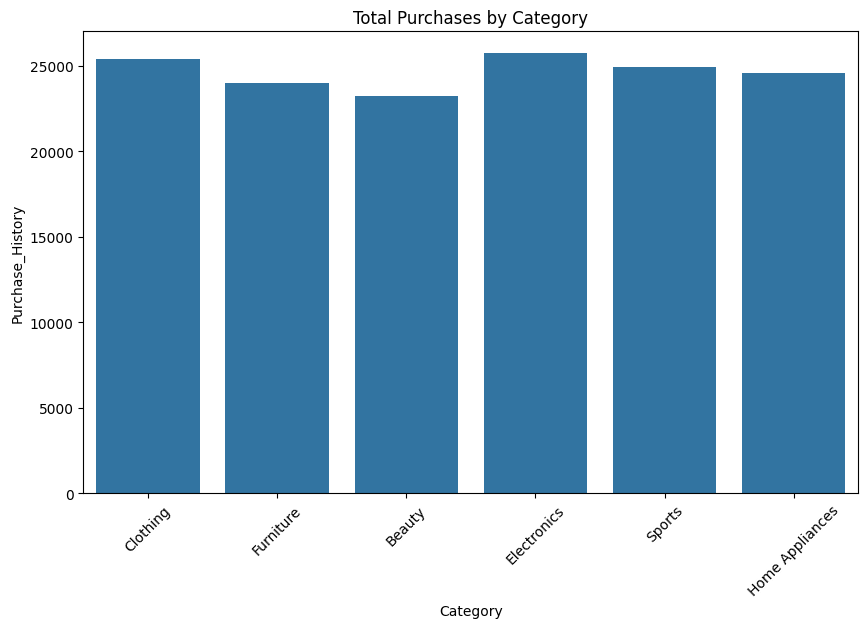

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df["Category"], y=df["Purchase_History"], estimator=np.sum, ci=None)
plt.xticks(rotation=45)
plt.title("Total Purchases by Category")
plt.show()

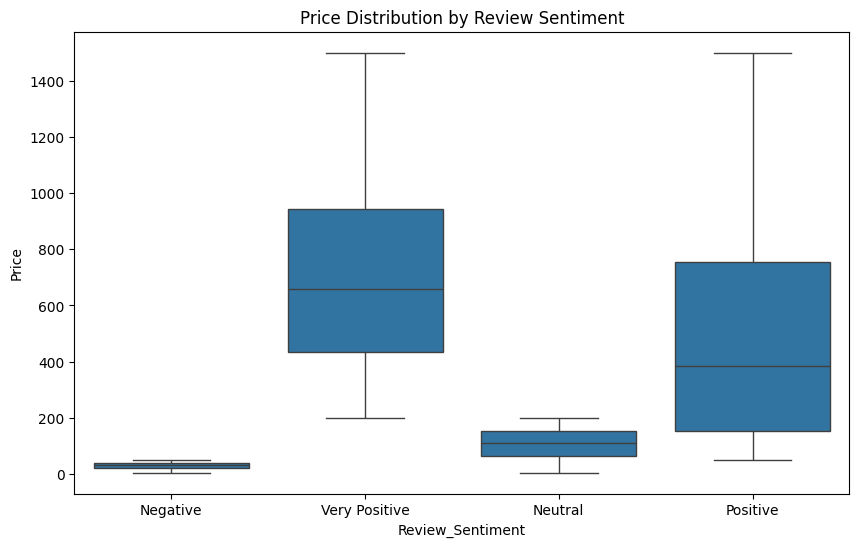

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Review_Sentiment", y="Price", data=df)
plt.title("Price Distribution by Review Sentiment")
plt.show()

In [11]:
pip install schedule


Note: you may need to restart the kernel to use updated packages.


# systematic data feed

In [ ]:
import schedule
import time

def fetch_new_data():
    global df
    new_data = pd.read_csv("ecommerce_data.csv")  
    df = pd.concat([df, new_data]).drop_duplicates()
    print("Data Updated.")
schedule.every(24).hours.do(fetch_new_data)

while True:
    schedule.run_pending()
    time.sleep(1)